### 1. Install and Import Dependencies

In [3]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cpu


In [1]:
import torch
from matplotlib import pyplot as plt 
import numpy as np
import cv2

In [ ]:
import seaborn as sns

### 2. Load model

In [8]:
# download pre-trained model(yolov5) from pytorch hub 
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\AI06/.cache\torch\hub\master.zip
YOLOv5  2022-8-5 Python-3.8.13 torch-1.8.2+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


### 3. Make Detections with Images

In [23]:
img = "https://assets.weforum.org/article/image/-SEFZUUSxWOm74QkKw80M7_6dvG3c6bMB6wAHvb9YVA.jpg"


In [37]:
results = model(img)
results.print()
results.show()



image 1/1: 2384x4240 1 drone
Speed: 630.4ms pre-process, 132.0ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


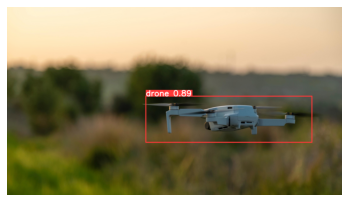

In [42]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.axis('off')
plt.savefig('detection01.jpg', dpi=300, bbox_inches='tight')
plt.show()



In [15]:
results.xyxy
results.render() 
results.show()  # 이미지 보여줌 

In [16]:
np.squeeze(results.render()).shape

(2384, 4240, 3)

### 4. Real-time Detections

In [18]:
cap = cv2.VideoCapture('drone.mp4')   # 0이면 웹캠
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()